1. Perform data preparations to clean data
2. Exploratory Data Analysis (explore the distributions and characteristics of the columns and compare variables to view their behavior and relationships)
3. Cluster the data using K-Means, Hierarchical Clustering
4. Create a prediction model using any classification algorithm and compare the results
5. Submit your result through Github with the code run and showing results

In [26]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from kneed import KneeLocator
from scipy.cluster.hierarchy import linkage, dendrogram
import scipy.cluster.hierarchy as sch
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


In [27]:
url = "https://raw.githubusercontent.com/Keipatr/student-prediction-analysis/main/data.csv"
df = pd.read_csv(url,delimiter=";")
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [29]:
missing_values = df.isnull().any()
total_missing = df.isnull().sum().sum()
print(f"Total Missing Values: {total_missing}\n")

print("Missing Values:")
print(missing_values)

Total Missing Values: 0

Missing Values:
Marital status                                    False
Application mode                                  False
Application order                                 False
Course                                            False
Daytime/evening attendance\t                      False
Previous qualification                            False
Previous qualification (grade)                    False
Nacionality                                       False
Mother's qualification                            False
Father's qualification                            False
Mother's occupation                               False
Father's occupation                               False
Admission grade                                   False
Displaced                                         False
Educational special needs                         False
Debtor                                            False
Tuition fees up to date                           False
Gender 

In [30]:
duplicate_rows = df[df.duplicated()]
total_duplicates = df.duplicated().sum()
print(f"Total Duplicate Rows: {total_duplicates}\n")

print("Duplicate Rows:")
print(duplicate_rows)

Total Duplicate Rows: 0

Duplicate Rows:
Empty DataFrame
Columns: [Marital status, Application mode, Application order, Course, Daytime/evening attendance	, Previous qualification, Previous qualification (grade), Nacionality, Mother's qualification, Father's qualification, Mother's occupation, Father's occupation, Admission grade, Displaced, Educational special needs, Debtor, Tuition fees up to date, Gender, Scholarship holder, Age at enrollment, International, Curricular units 1st sem (credited), Curricular units 1st sem (enrolled), Curricular units 1st sem (evaluations), Curricular units 1st sem (approved), Curricular units 1st sem (grade), Curricular units 1st sem (without evaluations), Curricular units 2nd sem (credited), Curricular units 2nd sem (enrolled), Curricular units 2nd sem (evaluations), Curricular units 2nd sem (approved), Curricular units 2nd sem (grade), Curricular units 2nd sem (without evaluations), Unemployment rate, Inflation rate, GDP, Target]
Index: []

[0 rows x

In [31]:
label_encoder = LabelEncoder()
df_encode = df.copy()
df_encode['Target'] = label_encoder.fit_transform(df_encode['Target'])
df_encode.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


In [32]:
numerical_columns = df_encode.select_dtypes(include=['float64', 'int64']).columns.drop(['Target'])
scaler = StandardScaler()

df_scaled = df_encode.copy() 
df_scaled[numerical_columns] = scaler.fit_transform(df_scaled[numerical_columns])
df_scaled.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,-0.294829,-0.095470,2.490896,-4.209520,0.350082,-0.35023,-0.804841,-0.126298,-0.036018,-0.669778,...,-0.282442,-2.838337,-2.042630,-1.471527,-1.963489,-0.199441,-0.287638,0.124386,0.765761,0
1,-0.294829,-0.209869,-0.554068,0.192580,0.350082,-0.35023,2.076819,-0.126298,-1.189759,-1.256427,...,-0.282442,-0.105726,-0.522682,0.518904,0.659562,-0.199441,0.876222,-1.105222,0.347199,2
2,-0.294829,-1.010660,2.490896,0.103404,0.350082,-0.35023,-0.804841,-0.126298,1.117723,0.959802,...,-0.282442,-0.105726,-2.042630,-1.471527,-1.963489,-0.199441,-0.287638,0.124386,0.765761,0
3,-0.294829,-0.095470,0.207173,0.444115,0.350082,-0.35023,-0.804841,-0.126298,1.181819,0.959802,...,-0.282442,-0.105726,0.490616,0.187165,0.416450,-0.199441,-0.813253,-1.466871,-1.375511,2
4,1.356212,1.162916,-0.554068,-0.408389,-2.856470,-0.35023,-2.473171,-0.126298,1.117723,1.024985,...,-0.282442,-0.105726,-0.522682,0.518904,0.531608,-0.199441,0.876222,-1.105222,0.347199,2


In [33]:
# df_cluster = df_scaled.drop(['Target'],axis=1)
df_cluster = df_scaled.copy()

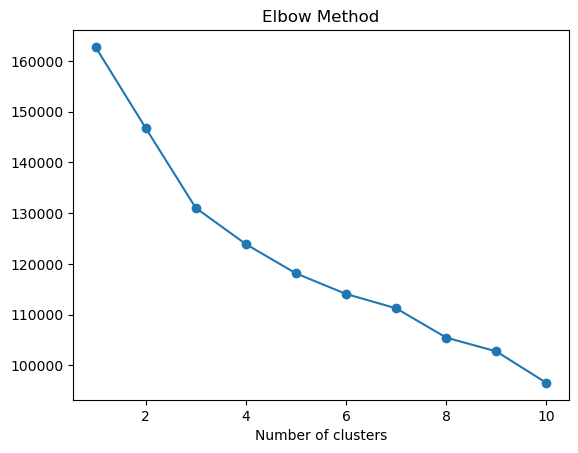

best cluster: 3


In [34]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init='auto',random_state=42)
    kmeans.fit(df_cluster)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse, marker='o', linestyle='-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.show()

findknee = KneeLocator(range(1, 11),
                       sse,
                       curve="convex",
                       direction="decreasing")

print('best cluster:', findknee.elbow)


In [35]:
best_kmeans = KMeans(n_clusters=findknee.elbow,n_init='auto',random_state=42)
best_kmeans.fit(df_cluster)
df['Kmeans Cluster'] = best_kmeans.labels_

In [36]:
aggregation_dict = {
    'Marital status': 'mean',  
    'Application mode': 'mean',  
    'Previous qualification': 'mean', 
    'Age at enrollment': 'mean', 
    'Curricular units 1st sem (grade)': 'mean', 
    'Curricular units 2nd sem (grade)': 'mean', 
    'GDP': 'mean', 
    'Target': lambda x: x.mode().iloc[0]  
}
cluster_summary = df.groupby('Kmeans Cluster').agg(aggregation_dict)
cluster_summary

,Marital status,Application mode,Previous qualification,Age at enrollment,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),GDP,Target
Kmeans Cluster,,,,,,,,
0,1.143604,16.237085,4.080873,21.996310,12.741707,12.616993,0.068595,Graduate
1,1.302491,33.081851,9.622776,28.729537,12.632019,12.649831,0.019217,Graduate
2,1.267116,23.000000,4.800224,26.172840,2.344969,0.755743,-0.246644,Dropout


<function matplotlib.pyplot.show(close=None, block=None)>

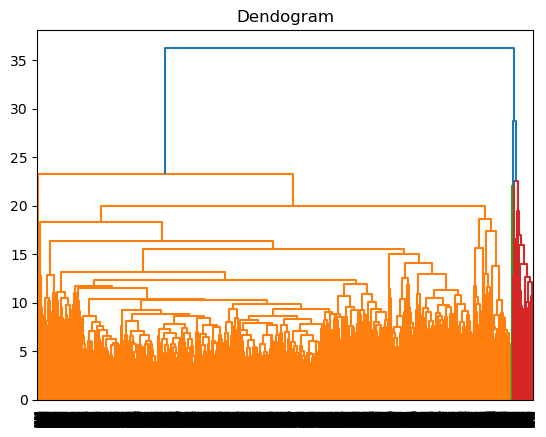

In [37]:
dist_matrix = sch.linkage(df_scaled, method='complete')
dn = sch.dendrogram(dist_matrix)
plt.title('Dendogram')
plt.show

In [38]:
hc = AgglomerativeClustering(n_clusters=findknee.elbow, metric='euclidean')
y_hc = hc.fit_predict(df_scaled)

In [39]:
df["Hierarchical Cluster"] = y_hc

aggregation_dict = {
    'Marital status': 'mean',  
    'Application mode': 'mean',  
    'Previous qualification': 'mean', 
    'Age at enrollment': 'mean', 
    'Curricular units 1st sem (grade)': 'mean', 
    'Curricular units 2nd sem (grade)': 'mean', 
    'GDP': 'mean', 
    'Target': lambda x: x.mode().iloc[0]  
}
cluster_summary = df.groupby('Hierarchical Cluster').agg(aggregation_dict)
cluster_summary

,Marital status,Application mode,Previous qualification,Age at enrollment,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),GDP,Target
Hierarchical Cluster,,,,,,,,
0,1.179931,17.080450,4.319493,22.525952,12.256899,11.997655,0.067261,Graduate
1,1.295019,32.881226,8.172414,28.804598,12.663811,12.688296,-0.053372,Graduate
2,1.128058,21.258993,4.516547,24.873381,1.816997,0.487650,-0.303050,Dropout


In [40]:
df_class = df_scaled.copy()

In [41]:
X = df_class.drop(['Target'], axis=1)  # Features
y = df_class['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [43]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

In [44]:
# Compare the results
print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("Classification Report:")
print(classification_report(y_test, rf_pred))

Random Forest Classifier:
Accuracy: 0.7593220338983051
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.77      0.81       316
           1       0.49      0.29      0.37       151
           2       0.76      0.92      0.83       418

    accuracy                           0.76       885
   macro avg       0.70      0.66      0.67       885
weighted avg       0.74      0.76      0.74       885



In [45]:
print("\nSupport Vector Machine (SVM) Classifier:")
print("Accuracy:", accuracy_score(y_test, svm_pred))
print("Classification Report:")
print(classification_report(y_test, svm_pred))


Support Vector Machine (SVM) Classifier:
Accuracy: 0.7491525423728813
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.73      0.79       316
           1       0.45      0.32      0.37       151
           2       0.76      0.92      0.83       418

    accuracy                           0.75       885
   macro avg       0.69      0.66      0.66       885
weighted avg       0.74      0.75      0.74       885

